In [1]:
import os
print(os.getcwd())

C:\Users\DWWillson\Desktop\CAISO Monthly Prices


In [1]:
import pandas as pd
df= pd.read_csv('October_2018.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44640 entries, 0 to 44639
Data columns (total 16 columns):
INTERVALSTARTTIME_GMT    44640 non-null object
INTERVALENDTIME_GMT      44640 non-null object
OPR_DT                   44640 non-null object
OPR_HR                   44640 non-null int64
NODE_ID_XML              44640 non-null object
NODE_ID                  44640 non-null object
NODE                     44640 non-null object
MARKET_RUN_ID            44640 non-null object
LMP_TYPE                 44640 non-null object
XML_DATA_ITEM            44640 non-null object
PNODE_RESMRID            44640 non-null object
GRP_TYPE                 44640 non-null object
POS                      44640 non-null int64
VALUE                    44640 non-null float64
OPR_INTERVAL             44640 non-null int64
GROUP                    44640 non-null int64
dtypes: float64(1), int64(4), object(11)
memory usage: 5.4+ MB


In [3]:
df.head()

,INTERVALSTARTTIME_GMT,INTERVALENDTIME_GMT,OPR_DT,OPR_HR,NODE_ID_XML,NODE_ID,NODE,MARKET_RUN_ID,LMP_TYPE,XML_DATA_ITEM,PNODE_RESMRID,GRP_TYPE,POS,VALUE,OPR_INTERVAL,GROUP
0,2018-10-01T07:00:00-00:00,2018-10-01T07:05:00-00:00,10/1/2018,1,TH_NP15_GEN-APND,TH_NP15_GEN-APND,TH_NP15_GEN-APND,RTM,MCC,LMP_CONG_PRC,TH_NP15_GEN-APND,ALL_APNODES,0,0.0,1,1
1,2018-10-01T07:05:00-00:00,2018-10-01T07:10:00-00:00,10/1/2018,1,TH_NP15_GEN-APND,TH_NP15_GEN-APND,TH_NP15_GEN-APND,RTM,MCC,LMP_CONG_PRC,TH_NP15_GEN-APND,ALL_APNODES,0,0.0,2,1
2,2018-10-01T07:10:00-00:00,2018-10-01T07:15:00-00:00,10/1/2018,1,TH_NP15_GEN-APND,TH_NP15_GEN-APND,TH_NP15_GEN-APND,RTM,MCC,LMP_CONG_PRC,TH_NP15_GEN-APND,ALL_APNODES,0,0.0,3,1
3,2018-10-01T07:15:00-00:00,2018-10-01T07:20:00-00:00,10/1/2018,1,TH_NP15_GEN-APND,TH_NP15_GEN-APND,TH_NP15_GEN-APND,RTM,MCC,LMP_CONG_PRC,TH_NP15_GEN-APND,ALL_APNODES,0,0.0,4,1
4,2018-10-01T07:20:00-00:00,2018-10-01T07:25:00-00:00,10/1/2018,1,TH_NP15_GEN-APND,TH_NP15_GEN-APND,TH_NP15_GEN-APND,RTM,MCC,LMP_CONG_PRC,TH_NP15_GEN-APND,ALL_APNODES,0,0.0,5,1


In [4]:
df_Oct= pd.read_csv('October_2018.csv', header= 0, usecols= [0,2,3,8,9,13,14],parse_dates= True, index_col= 'INTERVALSTARTTIME_GMT')


In [6]:
df_Nov= pd.read_csv('November_2018.csv', header= 0, usecols= [0,2,3,8,9,13,14],parse_dates= True, index_col= 'INTERVALSTARTTIME_GMT')


In [7]:
frames= [df_Oct, df_Nov]
df1= pd.concat(frames)

In [8]:
dfLMP= df1[df1['LMP_TYPE'] == 'LMP'] # drops the other four price components and reduces data rows by 80%

In [9]:
dfLMP['OPR_DT']= pd.to_datetime(dfLMP['OPR_DT']) #needed for plotting after the groupby

C:\Users\DWWillson\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [10]:
dfLMP.info() # as desired, the index is now the DateTime object (perfect for time series plotting)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17580 entries, 2018-10-01 07:00:00 to 2018-12-01 07:55:00
Data columns (total 6 columns):
OPR_DT           17580 non-null datetime64[ns]
OPR_HR           17580 non-null int64
LMP_TYPE         17580 non-null object
XML_DATA_ITEM    17580 non-null object
VALUE            17580 non-null float64
OPR_INTERVAL     17580 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 961.4+ KB


In [11]:
dfLMP.head() # Whoops.The Value is the price, but it is the sum of four components and these elements need to be dropped.

,OPR_DT,OPR_HR,LMP_TYPE,XML_DATA_ITEM,VALUE,OPR_INTERVAL
INTERVALSTARTTIME_GMT,,,,,,
2018-10-01 07:00:00,2018-10-01,1,LMP,LMP_PRC,33.38636,1
2018-10-01 07:05:00,2018-10-01,1,LMP,LMP_PRC,28.69877,2
2018-10-01 07:10:00,2018-10-01,1,LMP,LMP_PRC,30.99520,3
2018-10-01 07:15:00,2018-10-01,1,LMP,LMP_PRC,32.35621,4
2018-10-01 07:20:00,2018-10-01,1,LMP,LMP_PRC,43.27182,5


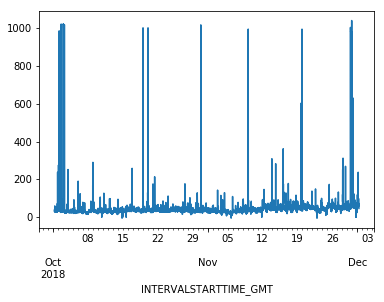

In [13]:
import matplotlib.pyplot as plt # shocking grid instability due to price peaks 
dfLMP['VALUE'].plot()
# plt.show()

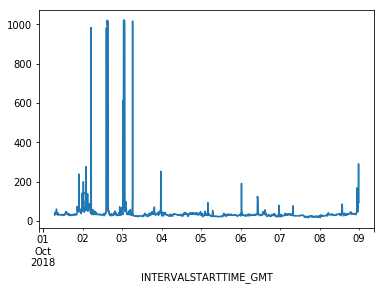

In [14]:
week_one= dfLMP.loc['2018-10-01':'2018-10-08'] # so a peak of $140/MWh is 14 cents
week_one['VALUE'].plot()

In [15]:
# df1.loc['2018-11-02':'2018-11-04', df1['VALUE']].plot()
df1.loc[:'2018-11-07',df1['VALUE']].PLOT()  # puzzling. Interval is described below as Categorical 
# but above from df.info() is is shown as a DateTime object!!
plt.show()
        

MemoryError: 

In [16]:
# prices= df1[df1.XML_DATA_ITEM == 'LMP_PRC'] # So this drops the 4 unwanted price components and reduces the size by 80%

In [17]:
dfLMP.head()

,OPR_DT,OPR_HR,LMP_TYPE,XML_DATA_ITEM,VALUE,OPR_INTERVAL
INTERVALSTARTTIME_GMT,,,,,,
2018-10-01 07:00:00,2018-10-01,1,LMP,LMP_PRC,33.38636,1
2018-10-01 07:05:00,2018-10-01,1,LMP,LMP_PRC,28.69877,2
2018-10-01 07:10:00,2018-10-01,1,LMP,LMP_PRC,30.99520,3
2018-10-01 07:15:00,2018-10-01,1,LMP,LMP_PRC,32.35621,4
2018-10-01 07:20:00,2018-10-01,1,LMP,LMP_PRC,43.27182,5


In [18]:
dfLMP= dfLMP.drop(['LMP_TYPE','XML_DATA_ITEM'], axis=1)
dfLMP.head()

,OPR_DT,OPR_HR,VALUE,OPR_INTERVAL
INTERVALSTARTTIME_GMT,,,,
2018-10-01 07:00:00,2018-10-01,1,33.38636,1
2018-10-01 07:05:00,2018-10-01,1,28.69877,2
2018-10-01 07:10:00,2018-10-01,1,30.99520,3
2018-10-01 07:15:00,2018-10-01,1,32.35621,4
2018-10-01 07:20:00,2018-10-01,1,43.27182,5


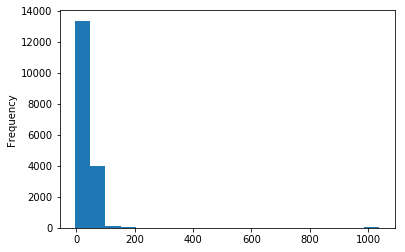

In [19]:
dfLMP.VALUE.plot(kind='hist', bins=20)
plt.show()

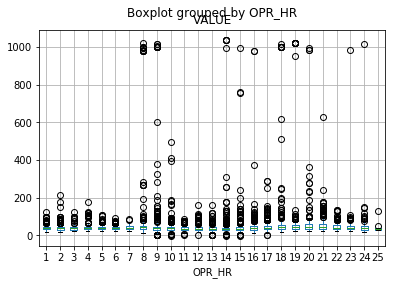

In [20]:
dfLMP.boxplot(column= 'VALUE', by= 'OPR_HR')
plt.show()

In [21]:
dfLMP.columns
dfLMP.shape

(17580, 4)

In [22]:
very_low_prices= dfLMP[dfLMP.VALUE < 30]  # Threshold price increased to $30/MWh, now have 1630 prices so > 720 for 2 hours
very_low_prices.shape

(4077, 4)

In [23]:
low_prices= dfLMP[(dfLMP.VALUE < 30) & (dfLMP.VALUE > -110)] # at $20 was (217,4) before -110 stipulation
low_prices.shape                                                # Puzzling since one observation was -200 !?

(4077, 4)

In [24]:
low_prices.min()

OPR_DT          2018-10-01 00:00:00
OPR_HR                            1
VALUE                      -4.78261
OPR_INTERVAL                      1
dtype: object

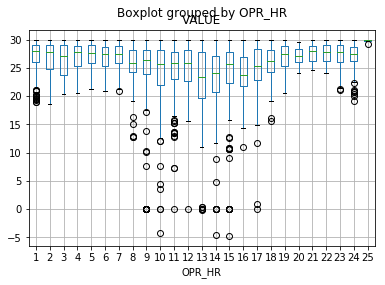

In [25]:
low_prices.boxplot(column= 'VALUE', by= 'OPR_HR')
plt.show()

In [26]:
g= low_prices.groupby('OPR_HR')
g.count()

# This seems to be saying that the three hours in November with the most frequent low prices are from 10am to 3pm
# But these 172 five-minute intervals average only 29 minutes a day of prices below $20/MWh
# Level 1 charger is normally 2 hours of charging: MAY NEED TO INCREASE THRESHOLD TO 3 CENTS/$30/MWh
# BIG QUESTION IS WHETHER THE DIFFERENCE FOR PEAK EVENING PRICES EXCEEDS 25 CENTS/KWH, OF $45/MWh (see p.17 of "Charging Smart")
# Counts can be compared to 30 days x 12 Intervals = 360 Intervals/month

,OPR_DT,VALUE,OPR_INTERVAL
OPR_HR,,,
1,154,154,154
2,185,185,185
3,190,190,190
4,169,169,169
5,160,160,160
6,171,171,171
7,151,151,151
8,117,117,117
9,212,212,212


In [27]:
low_prices.groupby('OPR_HR').mean()
# The lowest average prices are from 9am to 4pm, which is when Solar is strongest.

,VALUE,OPR_INTERVAL
OPR_HR,,
1,27.004890,7.181818
2,26.829673,7.275676
3,26.499848,6.515789
4,26.813026,6.532544
5,27.218515,5.725000
6,26.866546,4.707602
7,27.206881,4.344371
8,25.486830,8.683761
9,24.313317,7.707547


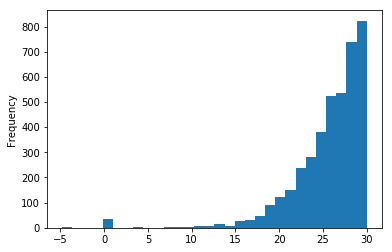

In [28]:
low_prices.VALUE.plot(kind='hist', bins=30)  # No showfliers= False !!

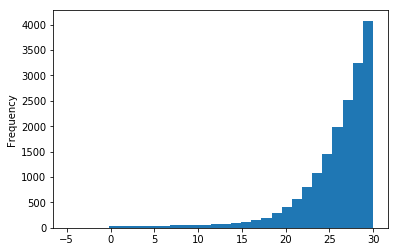

In [29]:
low_prices.VALUE.plot(kind='hist', bins=30, cumulative= True)
# Two hours per day average for a Level One EV charger is 24 intervals x 30 days = 720: THRESHOLD must be increased!!!
# Add a horizontal red line at 720 !!
# Define a function that computes the average price (eg still below 2 cents?)

In [30]:
dfLMP.head(3)

,OPR_DT,OPR_HR,VALUE,OPR_INTERVAL
INTERVALSTARTTIME_GMT,,,,
2018-10-01 07:00:00,2018-10-01,1,33.38636,1
2018-10-01 07:05:00,2018-10-01,1,28.69877,2
2018-10-01 07:10:00,2018-10-01,1,30.99520,3


In [31]:
dfLMP= dfLMP.rename({'OPR_DT':'date','OPR_HR':'hour','VALUE':'price','OPR_INTERVAL':'interval'}, axis='columns')
dfLMP.head(3)


,date,hour,price,interval
INTERVALSTARTTIME_GMT,,,,
2018-10-01 07:00:00,2018-10-01,1,33.38636,1
2018-10-01 07:05:00,2018-10-01,1,28.69877,2
2018-10-01 07:10:00,2018-10-01,1,30.99520,3


In [32]:
# this function returns PG&E's designation of Peak (P), Off-Peak (OP), or Standard (S) EV pricing according to the hour of day
def peak(hour): 
    if hour in [24,1,2,3,4,5,6,7]:
        return 'OP'
    elif hour in [15,16,17,18,19,20,21,22]:
        return 'P'
    else:
        return 'S'
    
    

In [33]:
# this function returns PG&E's designation of Peak (P), Off-Peak (OP), or Standard (S) EV pricing according to the hour of day
#def peak(hour): 
#    if hour in [list(range(1,8) + [24]]:
#       return 'OP'
#   elif hour in [list(range(15,23)]:
#        return 'P'
#    else:
#        return 'S'
    
# list comprehension version? see below

In [34]:
d= {'OP':list(range(1,8))+ [24], 'P':list(range(15,23)),'S':list(range(8,15)) + list(range(22,24))}
def PGE(hour):
    for key,value in d.items:
        if hour in d.value  #FIX THIS
            return d.key
print(PGE(3))

SyntaxError: invalid syntax (<ipython-input-34-0956b21a9c32>, line 4)

In [35]:
dfLMP= dfLMP.rename({'OPR_DT':'date','OPR_HR':'hour','VALUE':'price','OPR_INTERVAL':'interval'}, axis='columns')
dfLMP.head(3)


,date,hour,price,interval
INTERVALSTARTTIME_GMT,,,,
2018-10-01 07:00:00,2018-10-01,1,33.38636,1
2018-10-01 07:05:00,2018-10-01,1,28.69877,2
2018-10-01 07:10:00,2018-10-01,1,30.99520,3


In [36]:
peak(1)
peak(16)

'P'

In [37]:
dfLMP['PGE']= dfLMP.hour.apply(peak)
dfLMP.PGE.head()
dfLMP.PGE.tail()

INTERVALSTARTTIME_GMT
2018-12-01 07:35:00    OP
2018-12-01 07:40:00    OP
2018-12-01 07:45:00    OP
2018-12-01 07:50:00    OP
2018-12-01 07:55:00    OP
Name: PGE, dtype: object

In [38]:
dfLMP.head()

,date,hour,price,interval,PGE
INTERVALSTARTTIME_GMT,,,,,
2018-10-01 07:00:00,2018-10-01,1,33.38636,1,OP
2018-10-01 07:05:00,2018-10-01,1,28.69877,2,OP
2018-10-01 07:10:00,2018-10-01,1,30.99520,3,OP
2018-10-01 07:15:00,2018-10-01,1,32.35621,4,OP
2018-10-01 07:20:00,2018-10-01,1,43.27182,5,OP


In [39]:
g_peak= dfLMP.groupby(['date','PGE'])
daily_PGE= g_peak.price.mean()
daily_PGE.head(20)
dfPGE= daily_PGE.to_frame()
dfPGE.head()
dfPGE= dfPGE.sort_values(['date'])



In [40]:
dfPGE.head(50) # 
dfPGE.tail() # 
dfPGE.head()

price
date       PGE            
2018-10-01 OP    34.956693
           P     70.232417
           S     44.341260
2018-10-02 OP    46.452232
           P    151.112391

In [41]:
dfPGE= dfPGE.unstack('PGE')
dfPGE.head()

price                        
PGE                OP           P           S
date                                         
2018-10-01  34.956693   70.232417   44.341260
2018-10-02  46.452232  151.112391  137.108159
2018-10-03  25.348549   38.507018   33.874977
2018-10-04  30.630167   33.584138   34.415907
2018-10-05  25.627517   31.070652   29.883593

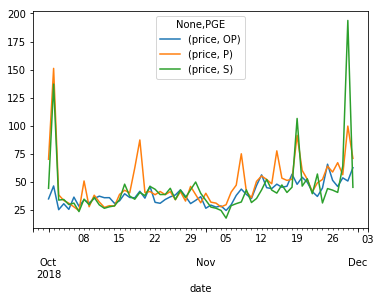

In [42]:
dfPGE.plot() # Surprises: the highest spikes are not Peak but Standard, 
# peak is evening from 2pm to 8pm!
# Peak seems to have recurring spikes perhaps related to the day of the week?
# on many days the standard price is below the off-peak price Can calculate frequency with a Boolean!
# Standard is from 8 until 2pm so prices are lowered by midday solar

In [43]:
dfPGE.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 61 entries, 2018-10-01 to 2018-11-30
Data columns (total 3 columns):
(price, OP)    61 non-null float64
(price, P)     61 non-null float64
(price, S)     61 non-null float64
dtypes: float64(3)
memory usage: 1.9 KB


In [45]:
dfPGE.columns= ['OP','P','S']
dfPGE.head(3)
dfPGE.tail()

,OP,P,S
date,,,
2018-11-26,51.455426,58.835906,42.743207
2018-11-27,45.992130,67.155858,40.713603
2018-11-28,53.666140,56.438910,64.134758
2018-11-29,50.851328,99.743466,193.772413
2018-11-30,62.724867,71.013740,45.236383


In [ ]:
# BIG QUESTION: EACH DAY FIND THE HIGHEST 100 PRICES AND THEN THE LOWEST 100 PRICES VIA SORT. 
# THEN SUBTRACT THE LOWEST FROM THE HIGHEST, AND SEE IF > $0.25. KEEP GOING UNTIL THIS THRESHOLD IS HIT! 
# SO CHARGE AT WORK FROM 9 TO 10AM AND USE AT HOME TO RUN AC IN PEAK HOURS!!!

In [ ]:
# We need suppose 2 hours on average daily, 24 intervals/day, 720/month. Find for cumulative of 720 the cut-off price
# Then calculate the average price (of course less than cutoff): compute for 720 vs 360, and annnualise cost benefit
# this is the economic value of the Level 2 Charger versus the Level 1.

In [ ]:
# downsample the 5-minute prices to hourly and match up with hourly wind and solar data (Dhavide Course One)